In [1]:
from google.colab import files
uploaded = files.upload()


Saving owid-covid-data.csv to owid-covid-data.csv


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('owid-covid-data.csv')

# Show basic info
print("Shape of the dataset:", df.shape)
df.head()


Shape of the dataset: (429435, 67)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [3]:
# Check for missing values
df.isnull().sum().sort_values(ascending=False).head(20)


,0
weekly_icu_admissions,418442
weekly_icu_admissions_per_million,418442
excess_mortality,416024
excess_mortality_cumulative_absolute,416024
excess_mortality_cumulative,416024
excess_mortality_cumulative_per_million,416024
weekly_hosp_admissions,404938
weekly_hosp_admissions_per_million,404938
icu_patients_per_million,390319
icu_patients,390319


In [4]:
df = df[['location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'people_vaccinated', 'population']]
df.head()


,location,date,total_cases,new_cases,total_deaths,new_deaths,people_vaccinated,population
0,Afghanistan,2020-01-05,0.0,0.0,0.0,0.0,NaN,41128772
1,Afghanistan,2020-01-06,0.0,0.0,0.0,0.0,NaN,41128772
2,Afghanistan,2020-01-07,0.0,0.0,0.0,0.0,NaN,41128772
3,Afghanistan,2020-01-08,0.0,0.0,0.0,0.0,NaN,41128772
4,Afghanistan,2020-01-09,0.0,0.0,0.0,0.0,NaN,41128772


In [5]:
df['date'] = pd.to_datetime(df['date'])


In [6]:
df.dropna(subset=['total_cases', 'new_cases', 'total_deaths', 'new_deaths'], how='all', inplace=True)


In [7]:
df['people_vaccinated'] = df['people_vaccinated'].fillna(0)


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 411804 entries, 0 to 429434
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   location           411804 non-null  object        
 1   date               411804 non-null  datetime64[ns]
 2   total_cases        411804 non-null  float64       
 3   new_cases          410159 non-null  float64       
 4   total_deaths       411804 non-null  float64       
 5   new_deaths         410608 non-null  float64       
 6   people_vaccinated  411804 non-null  float64       
 7   population         411804 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 28.3+ MB


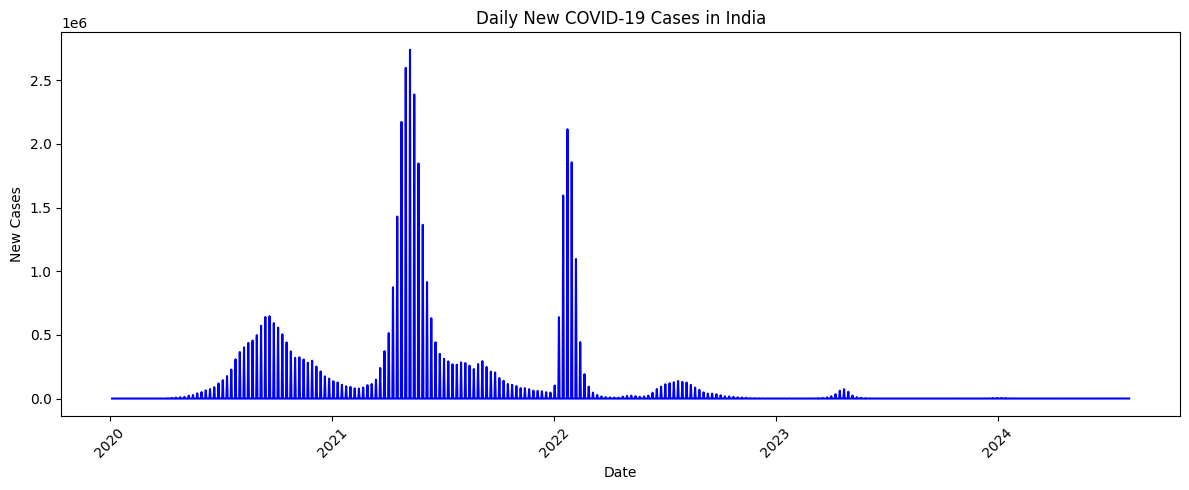

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter India data
india_df = df[df['location'] == 'India']

# Plot daily new cases
plt.figure(figsize=(12,5))
sns.lineplot(data=india_df, x='date', y='new_cases', color='blue')
plt.title('Daily New COVID-19 Cases in India')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-10-3658cc9e0b32>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='total_cases', y='location', palette='Reds_r')


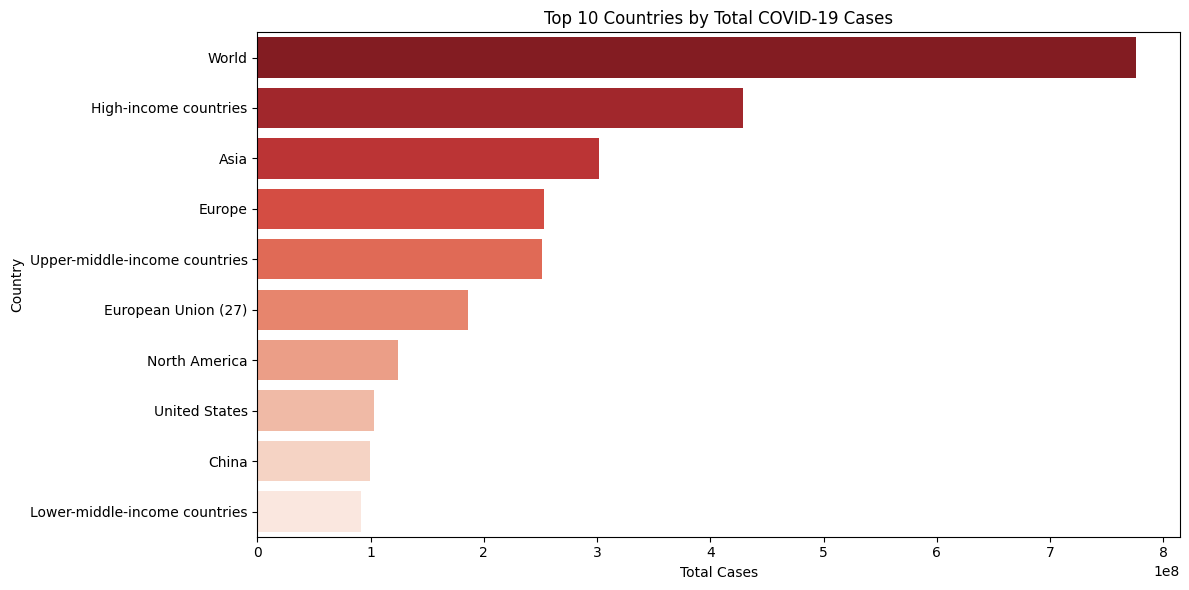

In [10]:
# Get the latest date for each country
latest_data = df.sort_values('date').groupby('location').tail(1)

# Sort by total_cases and pick top 10
top10 = latest_data.sort_values('total_cases', ascending=False).head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=top10, x='total_cases', y='location', palette='Reds_r')
plt.title('Top 10 Countries by Total COVID-19 Cases')
plt.xlabel('Total Cases')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


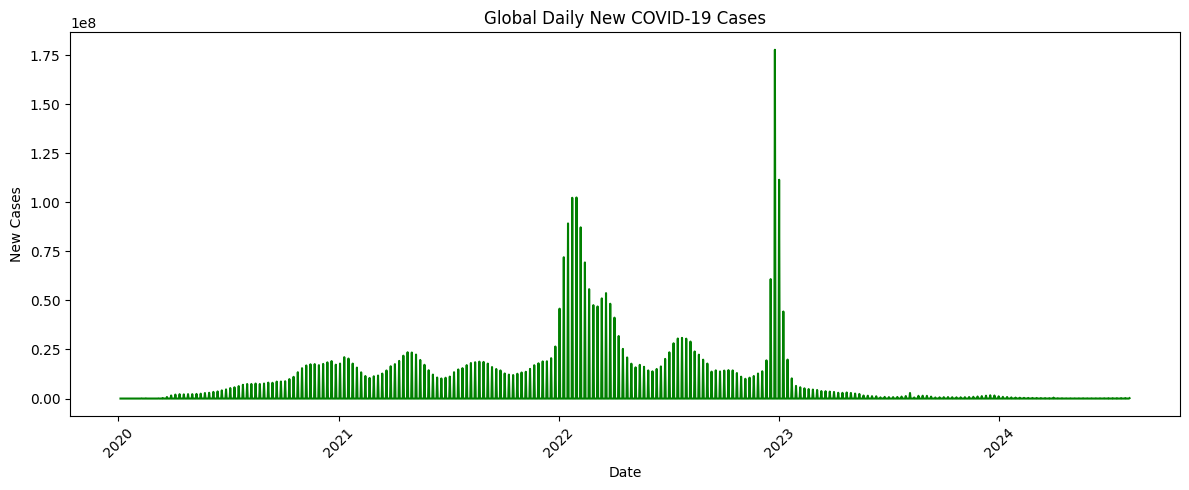

In [11]:
# Filter out continents and aggregate by date
global_df = df.groupby('date')[['new_cases']].sum().reset_index()

# Plot global new cases trend
plt.figure(figsize=(12,5))
sns.lineplot(data=global_df, x='date', y='new_cases', color='green')
plt.title('Global Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 📘 Project Summary – COVID-19 Data Analysis

### 🔍 Objective:
To explore and visualize COVID-19 data to understand the **global impact**, **country-level trends**, and **vaccination progress** using real-world datasets.

---

### 📌 Key Insights:

- 📈 **India’s daily new cases** peaked around **May 2021** during the Delta wave and again in **January 2022** during the Omicron wave.
- 🌍 **Cases :** :
  1. **World** (~800M+ cases)  
  2. **High-income countries** (~450M+ cases)  
  3. **Asia** and **Europe** (each with ~250M–300M cases)
- 🌐 **Global trend** showed massive surges in **mid-2021** and **early 2022**, followed by a steady decline due to widespread **vaccination**, **natural immunity**, and **health measures**.
- 💉 **Vaccination progress** was uneven across regions but showed a **consistent upward trend**, especially in high-income countries.

---

### 📊 Tools Used:
- **Python**
- **Pandas**, **Matplotlib**
- **Google Colab** (for development and visualization)

---

### ✅ Skills Learned:
- Cleaning and preprocessing real-world datasets
- Handling missing and inconsistent data
- Creating and interpreting **time-series** and **comparative visualizations**
- Extracting **actionable insights** from complex datasets
- Understanding **global health trends** through data
